In [2]:
from fastai.vision.all import *

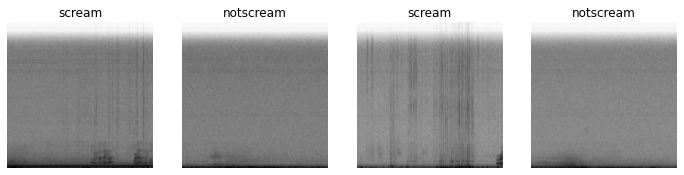

In [13]:
path = Path('train/')

spectrograms = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=21),
    get_y=parent_label,
    item_tfms=Resize(224))

dls = spectrograms.dataloaders(path)
dls.show_batch(max_n=4, nrows=1)

In [14]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
#learn = learn.load('model')

In [22]:
learn.fine_tune(10, 3e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.105609,0.620113,0.037037,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.023667,0.878748,0.037037,00:42
1,0.035502,1.388691,0.086420,00:43
2,0.078279,6.222711,0.493827,00:42
3,0.093809,2.719772,0.234568,00:42
4,0.107031,3.544626,0.370370,00:42
5,0.123232,1.616838,0.037037,00:44
6,0.111755,2.325088,0.037037,00:44
7,0.103240,1.323094,0.037037,00:43
8,0.101246,0.835731,0.037037,00:42
9,0.101141,0.643287,0.037037,00:45


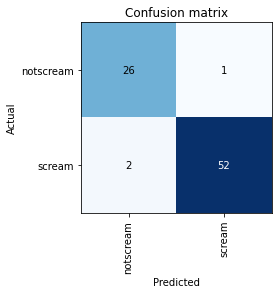

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

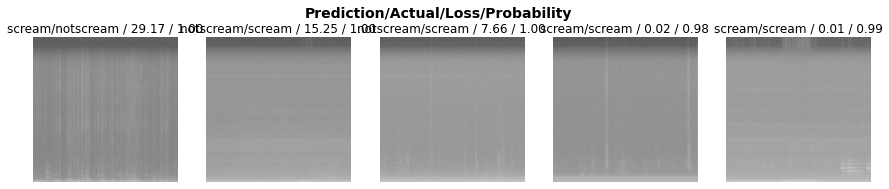

In [24]:
interp.plot_top_losses(5, nrows=1)

SuggestedLRs(valley=0.00015848931798245758)

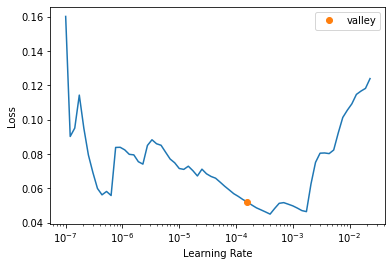

In [26]:
learn.lr_find()

In [25]:
learn.save('model')
learn.export()